In [1]:
import os
import math
import glob
import itertools

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reports_dir = '/data/benchmark_output/nemo_20220714'

kpis = ['novelty', 'validity', 'unique']
comparison_fld = 'exp_name' # radius
value_fld = 'value'

In [3]:
def load_files(filenames):
    for filename in filenames:
        # TODO: exp_name should be a column in the report
        exp_name = filename.split('-')[-2]
        df = pd.read_csv(filename)
        df['exp_name'] = list(itertools.repeat(exp_name, df.shape[0]))
        yield (df)

## Samples KPI Plots

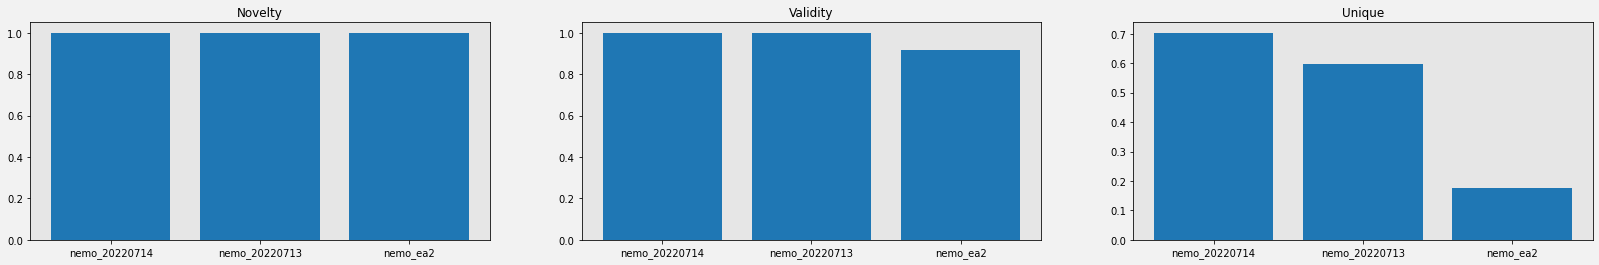

In [4]:
num_plots = len(kpis)
plots_per_row = 3
rows = math.ceil(num_plots / plots_per_row)
fig = plt.figure(figsize=(28, (rows * 4)), facecolor=(.95, .95, .95))
axs = fig.subplots(math.ceil(num_plots / plots_per_row), 
                   math.ceil(num_plots / rows))

for i, kpi in enumerate(kpis):
    files = sorted(glob.glob(os.path.join(reports_dir, f'*{kpi}.csv'),
                             recursive=False))
    plt_df = pd.concat(load_files(files))
    labels = plt_df[comparison_fld]
    values = plt_df[value_fld]
    j = i // plots_per_row
    k = i % plots_per_row
    axs[k].bar(labels, values)
    axs[k].set_title(kpi.title())
    axs[k].set_facecolor((.9, .9, .9))

fig.show()
fig.savefig('sample_metrics.png')

In [5]:
# from bokeh.io import output_notebook, push_notebook, show
# from bokeh.palettes import Spectral5
# from bokeh.plotting import figure
# from bokeh.sampledata.autompg import autompg as df
# from bokeh.transform import factor_cmap
# from bokeh.layouts import column, gridplot

# output_notebook()


# def split(a, n):
#     k, m = divmod(len(a), n)
#     return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

# plots = []
# for i, kpi in enumerate(kpis):
#     files = sorted(glob.glob(os.path.join(reports_dir, f'*{kpi}.csv'),
#                              recursive=False))
#     plt_df = pd.concat(load_files(files))

#     p = figure(width=400,
#                height=200,
#                x_range=plt_df[comparison_fld],
#                title=kpi.title())

#     p.vbar(x=plt_df[comparison_fld],
#            top=plt_df[value_fld],
#            width=0.9)
#     plots.append(p)

# plots = split(plots, len(plots) // 3)
# grid_plot = gridplot(plots, toolbar_location='right')
# show(grid_plot)